# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [8]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new dataframe from your CSV
df = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\cleaning-data\\Rat_Sightings.csv")

In [4]:
# Print out any information you need to understand your dataframe
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     90983 non-null   object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                92840 non-null   object 
 10  Street Name                     92839 non-null   object 
 11  Cross Street 1                  85257 non-null   object 
 12  Cross Street 2  

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

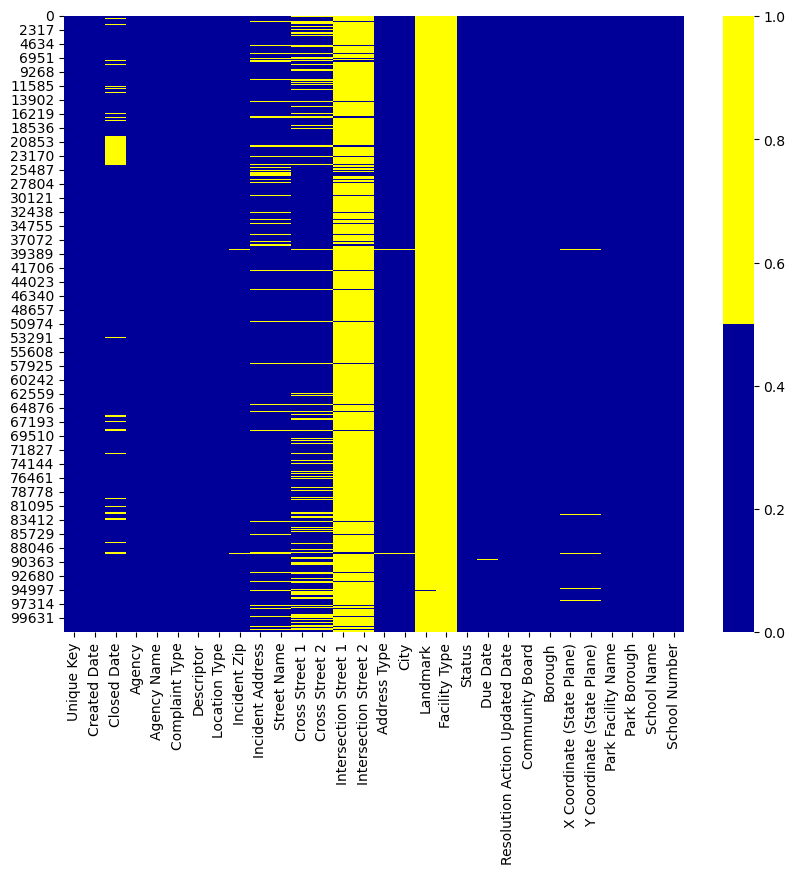

In [6]:
# Plot a heatmap of any missing data
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [9]:
# Try out a missing data percentage list! 
for col in df.columns:
    pctMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pctMissing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

In [63]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    numMissing = np.sum(missing)
    
    if numMissing > 0:  
        print('Created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

isMissingCols = [col for col in df.columns if 'ismissing' in col]
df['numMissing'] = df[isMissingCols].sum(axis=1)

df['numMissing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='numMissing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [60]:
# Handle any missing data in your dataframe.
colsToDrop = ["Landmark","Facility Type","School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"]
dfLessDropped = df.drop(colsToDrop, axis=1)
dfLessDropped.info(verbose=True) 

df["Closed Date"] = df["Closed Date"].fillna("_MISSING")
df["Incident Address"] = df["Incident Address"].fillna("_MISSING")
df["Street Name"] = df["Street Name"].fillna("_MISSING")
df["Cross Street 1"] = df["Cross Street 1"].fillna("_MISSING")
df["Cross Street 2"] = df["Cross Street 2"].fillna("_MISSING")
df["Intersection Street 1"] = df["Intersection Street 1"].fillna("_MISSING")
df["Intersection Street 2"] = df["Intersection Street 2"].fillna("_MISSING")
df["School Not Found"] = df["School Not Found"].fillna("_MISSING")
df["Location"] = df["Location"].fillna("_MISSING")

df["X Coordinate (State Plane)"] = df["X Coordinate (State Plane)"].fillna(-999)
df["Y Coordinate (State Plane)"] = df["Y Coordinate (State Plane)"].fillna(-999)
df["Latitude"] = df["Latitude"].fillna(-999)
df["Longitude"] = df["Longitude"].fillna(-999)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 73 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unique Key                                101914 non-null  int64  
 1   Created Date                              101914 non-null  object 
 2   Closed Date                               101914 non-null  object 
 3   Agency                                    101914 non-null  object 
 4   Agency Name                               101914 non-null  object 
 5   Complaint Type                            101914 non-null  object 
 6   Descriptor                                101914 non-null  object 
 7   Location Type                             101908 non-null  object 
 8   Incident Zip                              101578 non-null  float64
 9   Incident Address                          101914 non-null  object 
 10  Street Name         

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

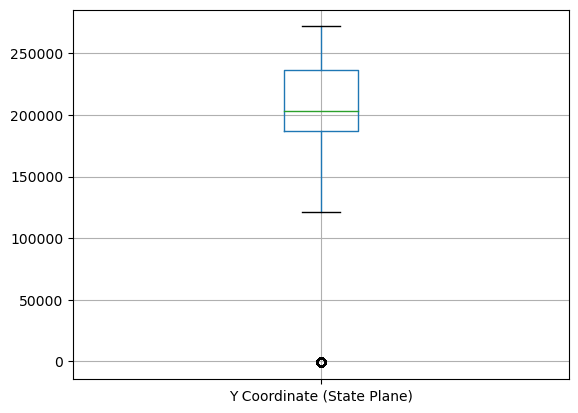

In [36]:
# Plot a histogram to see if there are any outliers.
#df["Latitude"].hist(bins=100)
#df["Longitude"].hist(bins=100)
#df["X Coordinate (State Plane)"].hist(bins=100)
#df["Y Coordinate (State Plane)"].hist(bins=100)

#df.boxplot(column=["Latitude"])
#df.boxplot(column=["Longitude"])
#df.boxplot(column=["X Coordinate (State Plane)"])
df.boxplot(column=["Y Coordinate (State Plane)"])

In [33]:
# Use the describe() method
#df["Latitude"].describe()
#df["Longitude"].describe()
#df["X Coordinate (State Plane)"].describe()
df["Y Coordinate (State Plane)"].describe()

count    101914.000000
mean     207187.733854
std       34547.072359
min        -999.000000
25%      186681.250000
50%      203143.000000
75%      236184.000000
max      271876.000000
Name: Y Coordinate (State Plane), dtype: float64

In [ ]:
# Plot a bar chart
#df["Latitude"].value_counts().plot.bar() - takes too long to load.

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101391 entries, 0 to 101913
Data columns (total 86 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unique Key                                101391 non-null  int64  
 1   Created Date                              101391 non-null  object 
 2   Closed Date                               101391 non-null  object 
 3   Agency                                    101391 non-null  object 
 4   Agency Name                               101391 non-null  object 
 5   Complaint Type                            101391 non-null  object 
 6   Descriptor                                101391 non-null  object 
 7   Location Type                             101391 non-null  object 
 8   Incident Zip                              101391 non-null  float64
 9   Incident Address                          101391 non-null  object 
 10  Street Name         

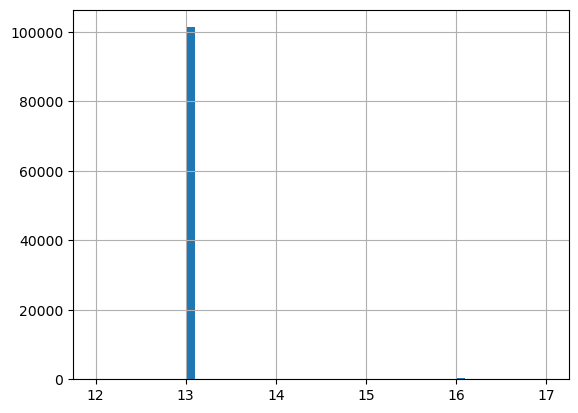

In [58]:
# Handle any outliers in your dataframe
missingByRow = df.isna().sum(axis="columns")
missingByRow.hist(bins=50)
dfLessMissingRows = df[missingByRow < 14].copy()
dfLessMissingRows.shape

dfLessMissingRows.info(verbose=True)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [65]:
# Look for any irrelevant data in the dataframe. How will you handle it?
colsToDrop = ["numMissing","num_missing","Location_ismissing","Longitude_ismissing","Latitude_ismissing","Ferry Terminal Name_ismissing","Ferry Direction_ismissing","Garage Lot Name_ismissing","Bridge Highway Segment_ismissing","Road Ramp_ismissing","Bridge Highway Direction_ismissing","Bridge Highway Name_ismissing","Taxi Pick Up Location_ismissing","Taxi Company Borough_ismissing","Vehicle Type_ismissing","School or Citywide Complaint_ismissing","School Not Found_ismissing","Y Coordinate (State Plane)_ismissing","X Coordinate (State Plane)_ismissing","Resolution Action Updated Date_ismissing","Due Date_ismissing","Facility Type_ismissing","Landmark_ismissing","City_ismissing","Address Type_ismissing","Intersection Street 2_ismissing","Intersection Street 1_ismissing","Cross Street 2_ismissing","Cross Street 1_ismissing","Street Name_ismissing","Incident Address_ismissing","Incident Zip_ismissing","Location Type_ismissing","Closed Date_ismissing","Landmark","Facility Type","School or Citywide Complaint","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction","Ferry Terminal Name"]
dfLessDropped = df.drop(colsToDrop, axis=1)
dfLessDropped.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      101914 non-null  int64  
 1   Created Date                    101914 non-null  object 
 2   Closed Date                     101914 non-null  object 
 3   Agency                          101914 non-null  object 
 4   Agency Name                     101914 non-null  object 
 5   Complaint Type                  101914 non-null  object 
 6   Descriptor                      101914 non-null  object 
 7   Location Type                   101908 non-null  object 
 8   Incident Zip                    101578 non-null  float64
 9   Incident Address                101914 non-null  object 
 10  Street Name                     101914 non-null  object 
 11  Cross Street 1                  101914 non-null  object 
 12  Cross Street 2  

In [70]:
# Look for duplicates. How will you handle any duplicates?
key = ["Created Date", "Closed Date", "Location"]

dfLessDropped.fillna(-999).groupby(key)["Unique Key"].count().sort_values(ascending=False).head(20)

dfDedupped = dfLessDropped.drop_duplicates(subset=key)

print(dfLessDropped.shape)
print(dfDedupped.shape)

(101914, 39)
(98844, 39)


In [69]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
numRows = len(dfLessDropped.index)
lowInformationCols = [] #

for col in dfLessDropped.columns:
    cnts = dfLessDropped[col].value_counts(dropna=False)
    topPct = (cnts/numRows).iloc[0]
    
    if topPct > 0.95:
        lowInformationCols.append(col)
        print('{0}: {1:.5f}%'.format(col, topPct*100))
        print(cnts)
        print()

Agency: 100.00000%
DOHMH    101914
Name: Agency, dtype: int64

Agency Name: 100.00000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64

Complaint Type: 100.00000%
Rodent    101914
Name: Complaint Type, dtype: int64

Descriptor: 100.00000%
Rat Sighting    101914
Name: Descriptor, dtype: int64

Park Facility Name: 100.00000%
Unspecified    101914
Name: Park Facility Name, dtype: int64

School Name: 100.00000%
Unspecified    101914
Name: School Name, dtype: int64

School Number: 100.00000%
Unspecified    101914
Name: School Number, dtype: int64

School Region: 100.00000%
Unspecified    101914
Name: School Region, dtype: int64

School Code: 100.00000%
Unspecified    101914
Name: School Code, dtype: int64

School Phone Number: 100.00000%
Unspecified    101914
Name: School Phone Number, dtype: int64

School Address: 100.00000%
Unspecified    101914
Name: School Address, dtype: int64

School City: 100.00000%
Unspecified    101914
Name: School City, dtype: int

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [71]:
# Try to convert all the strings in a column to lower or upper case.
dfDedupped["Agency Name"] = dfDedupped["Agency Name"].str.lower()
dfDedupped["Agency Name"].value_counts(dropna=False)

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_1576\1911014872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDedupped["Agency Name"] = dfDedupped["Agency Name"].str.lower()


department of health and mental hygiene    98844
Name: Agency Name, dtype: int64